## Experiments implementing Gradient Descent on Python

Importing libraries

In [16]:
import numpy as np

Initializing X random integer vector

In [17]:
x_100 = np.random.randint(1050, size=100)

Initializing Y vector based on $Y = X * 2 + 200$

In [18]:
y_100 = x_100 * 2 + 200

## Gradient Descent Function

This gradient descent function was implemented based on fast.ai Excel Spreadsheet.

In [24]:
def adam(x_arr, y_arr, step, lr, beta, beta2, x0 = 0, x1 = 0, momentum_x0 = 0, momentum_x1 = 0, sq_momentum_x0 = 0, sq_momentum_x1 =0):
    # Initializes Mean Squared Error List
    mse_list = []
    for x, y in zip(x_arr, y_arr):
        # Make prediction for a value of x
        prediction = x0 + x1 * x
        
        # Calculates Mean Squared Error
        mse = (y - prediction) ** 2
        
        # Calculates error for small increments in x0        
        err_x0 = ((x0 + step + x1 * x) - y)**2
        
        # Calculates error for small increments in x1
        err_x1 = ((x0 + (x1 + step) * x) - y)**2
        
        # Calculates how much the error changes by the small increment in x0        
        dx0 = (err_x0 - mse) / step
        
        # Momentum X0
        momentum_x0 = dx0 * (1 - beta) + momentum_x0 * beta
        
        # Calculates how much the error changes by the small increment in x1        
        dx1 = (err_x1 - mse) / step
        
        # Momentum X1        
        momentum_x1 = dx1 * (1 - beta) + momentum_x1 * beta
        
        # Squared Momentum X0
        sq_momentum_x0 = momentum_x0**2 * (1 - beta2) + sq_momentum_x0 * beta2
        
        # Squared Momentum X0
        sq_momentum_x1 = momentum_x1**2 * (1 - beta2) + sq_momentum_x1 * beta2
          
        # Sets up new values for x0 and x1
        x0 -= momentum_x0 * lr / (sq_momentum_x0 ** 1/2)
        x1 -= momentum_x1 * lr / (sq_momentum_x1 ** 1/2)
        
        # Appends Mean Squared Error to list
        mse_list.append(mse)
        
    # Calculates the Root Mean Squared Error for the whole cycle
    rmse = sum(mse_list)**1/2
    
    # Returns Values        
    return x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1, rmse

## Choosing Learning Rate

Importing pandas

In [25]:
import pandas as pd

Testing a bunch of learning rates.

In [29]:
rmse_list = []
for i in range(-5, 5):
    x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1 = 0, 0, 0, 0, 0, 0
    for w in range(0, 1):
        x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1, rmse = adam(x_100, y_100, 0.00001, 1/10**i, .7, .9, x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1)
    rmse_list.append(rmse)

Checking which is the small learning rate, that provess to be 10 * 0.06

In [30]:
rmse_list

[119598105.80684878,
 3210548.074872493,
 63589845.0624075,
 87700034.62347132,
 90197517.5738144,
 90448039.61765853,
 90473099.48444484,
 90475605.54767106,
 90475856.15475932,
 90475881.21547586]

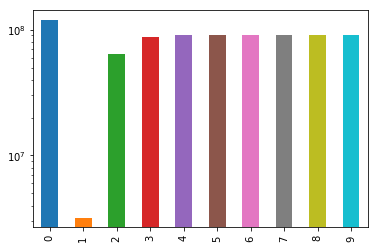

In [31]:
pd.Series(rmse_list).plot.bar(logy=True)

In [32]:
rmse_list = []
for w in range(0, 1000):
    x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1, rmse = adam(x_100, y_100, 0.00001, 1/10**-4, .7, .9, x0, x1, momentum_x0, momentum_x1, sq_momentum_x0, sq_momentum_x1)
    rmse_list.append(rmse)

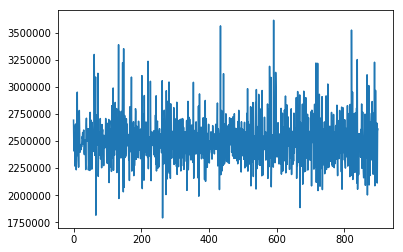

In [33]:
pd.Series(rmse_list[100:]).plot()

In [73]:
rmse_list[-1]

nan

In [80]:
rmse_list = []

for i in range(0,100):
    x0, x1, momentum_x0, momentum_x1 = 0, 0, 0, 0
    for w in range(0, 1000):
        x0, x1, momentum_x0, momentum_x1, rmse = momentum(x_100, y_100, 0.00001, 1/10**6, i/100, x0, x1, momentum_x0, momentum_x1)
    rmse_list.append(rmse)

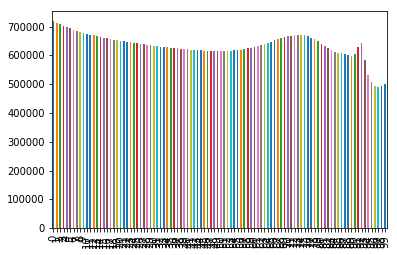

In [81]:
pd.Series(rmse_list).plot.bar()

In [82]:
pd.Series(rmse_list).sort_values()

97    489938.453706
98    493786.169279
96    495289.898089
99    499018.584800
95    506799.615623
94    531837.026079
93    585338.353220
89    598982.874621
88    602181.754018
90    603952.075403
87    605459.331081
86    607532.707068
85    609793.488569
84    613399.354375
49    615219.467574
50    615231.785860
48    615382.267638
51    615441.390381
47    615699.487746
52    615871.448020
46    616152.242412
53    616545.528481
45    616723.675940
44    617399.060089
54    617486.881096
43    618165.785581
83    618684.328288
55    618717.574531
42    619013.266762
41    619932.781652
          ...      
78    656015.410720
67    656358.427487
17    657185.327148
16    659465.301648
68    660175.532482
77    661805.309142
15    661842.745934
69    663659.242027
14    664327.991012
76    666212.362637
70    666666.298610
13    666932.582095
71    669045.326758
75    669209.603357
12    669669.318488
72    670640.598016
74    670865.918647
73    671297.109067
11    672552.296875


In [77]:
rmse_list[]

499018.5847999307